Guillermo Ramirez  
861299027  
EE 240  
HW 1  

**H1.1**: Here is an experiment that illustrates the difference between a single bin and multiple bins. Run a computer simulation for flipping 1,000 fair coins. Flip each coin independently 10 times. Let's focus on 3 coins as follows. *c<sub>1<sub/>* is the first coin flipped; *c<sub>rand<sub/>* is a coin you choose at random; *c<sub>min<sub/>* is the coin that had the minimum frequency of heads (pick the earlier one in case of a tie). Let *ν<sub>1<sub/>*, *ν<sub>rand<sub/>*, and *ν<sub>min<sub/>* be the fraction of heads you obtain for the respective three coins. For a coin, let µ be its probability of heads.

(a) What is µ for the three coins selected?

*µ<sub>1</sub>* = *µ<sub>rand</sub>* = *µ<sub>min</sub>* = 0.5  

(b) Repeat this entire experiment a large number of times (e.g., 100,000 runs of the entire experiment) to get several instances of ν1, νrand, and νmin and plot the histograms of the distributions of ν1, νrand, and νmin. Notice that which coins end up being crand and cmin may differ from one run to another.  

In [5]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt
mu_1 = .5
mu_rand = .5
mu_min = .5
N = 10000
nu_1 = np.zeros(N)
nu_rand  = np.zeros(N)
nu_min = np.zeros(N)

for i in range(N):
    all_coins = np.random.randint(2, size=(1000,10))
    # heads = 1
    # tails = 0
    heads_count = np.sum(all_coins,axis = 1)
    rand_loc = random.randrange(1000)
    min_loc = np.argmin(heads_count)
    nu_1[i] = heads_count[0]/10.0
    nu_rand[i] = heads_count[rand_loc]/10.0
    nu_min[i] = heads_count[min_loc]/10.0
    
hist_nu_1,bins = np.histogram(nu_1,bins = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1]) 
hist_nu_rand,bins = np.histogram(nu_rand,bins = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1]) 
hist_nu_min,bins = np.histogram(nu_min,bins = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1]) 



Text(0.5, 0.98, 'Histogram of $\\nu_{min}$')

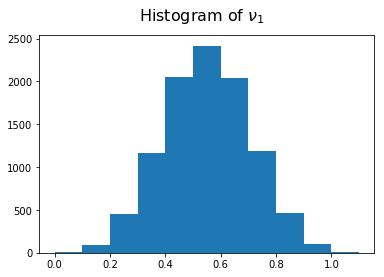

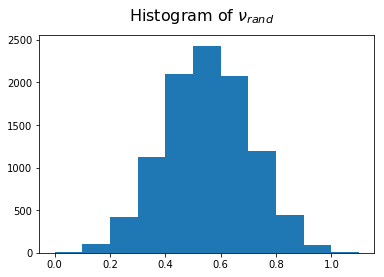

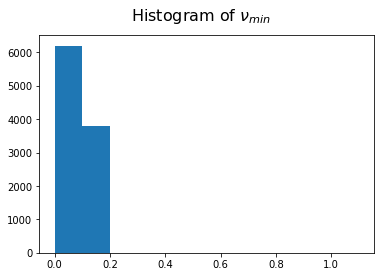

In [6]:
fig_1 = plt.figure()
fig1 = plt.subplot(111)
fig1.hist(nu_1,bins = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1])
fig_1.suptitle("Histogram of $\\nu_1$",fontsize = 16)

fig_2 = plt.figure()
fig2 = plt.subplot(111)
fig2.hist(nu_rand,bins = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1])
fig_2.suptitle("Histogram of $\\nu_{rand}$",fontsize = 16)

fig_3 = plt.figure()
fig3 = plt.subplot(111)
fig3.hist(nu_min,bins = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1])
fig_3.suptitle("Histogram of $\\nu_{min}$",fontsize = 16)

(c) Using part 1b plot estimates for P[|ν − µ| > $\epsilon$] as a function of $\epsilon$, together with the Hoeffding bound 2e<sup>−2$\epsilon$2N</sup> on the same graph.

(0, 1)

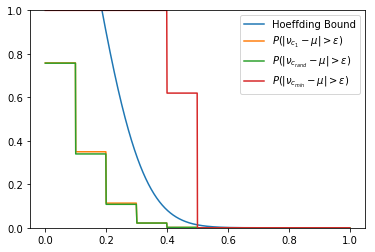

In [7]:
epsilon = np.linspace(0,1,1001)
hoeffding_bound = 2*np.exp(-2*np.power(epsilon,2)*10)

p_c_1 = np.zeros(1001)
p_c_rand = np.zeros(1001)
p_c_min = np.zeros(1001)

nu_1_size = np.size(nu_1)
nu_rand_size = np.size(nu_rand)
nu_min_size = np.size(nu_min)

mod_nu_1 = np.subtract(nu_1, mu_1)
mod_nu_rand = np.subtract(nu_rand, mu_rand)
mod_nu_min = np.subtract(nu_min, mu_min)

for i in (np.where(mod_nu_1 < 0)):
    mod_nu_1[i] = mod_nu_1[i] * -1
for i in (np.where(mod_nu_rand < 0)):
    mod_nu_rand[i] = mod_nu_rand[i] * -1
for i in (np.where(mod_nu_min < 0)):
    mod_nu_min[i] = mod_nu_min[i] * -1


for i in range(1001):
    p_c_1[i] = np.sum(np.where(mod_nu_1 > epsilon[i], 1 , 0))/nu_1_size
    p_c_rand[i] = np.sum(np.where(mod_nu_rand > epsilon[i], 1 , 0))/nu_rand_size
    p_c_min[i] = np.sum(np.where(mod_nu_min > epsilon[i], 1 , 0))/nu_min_size
fig_3 = plt.figure()
fig3 = plt.subplot(111)
fig3.plot(epsilon,hoeffding_bound, label = 'Hoeffding Bound')
fig3.plot(epsilon,p_c_1, label = '$P(|\\nu_{c_1}-\mu| > \epsilon)$')
fig3.plot(epsilon,p_c_rand, label = '$P(|\\nu_{c_{rand}}-\mu| > \epsilon)$')
fig3.plot(epsilon,p_c_min, label = '$P(|\\nu_{c_{min}}-\mu| > \epsilon)$')
fig3.legend()
fig3.set_ylim(0,1)



(d) Which coins obey the Hoeffding bound, and which do not? Explain why

As can be seen from the graph, the coins *c<sub>1</sub>* and *c<sub>rand</sub>* obey th Hoeffding bound while the coin *c<sub>min</sub>* does not. *c<sub>min</sub>* does not beacuse it is not chosen at random thus changing its probabilities.

**H1.2**: Posterior probability estimation for bin selection problem (curse of dimensionality).

(a)  Suppose we have ten bins (four labeled A, six labeled B). Each bin has balls with two colors (red and blue). The distribution of red and blue balls in bin A 
is (0.3, 0.7). The distribution of red and blue balls in bin B is (0.7, 0.3). We randomly select a bin and draw two balls with *replacement*. That is, we select a bin, pick one ball, put it back, and pick another ball from the *same* bin. Estimate the probability that we selected bin A given the selected balls are red and blue. 

$$P(A\,|\,ball = red, blue) = \frac{P(ball = red, blue\,|\,A)P(A)}{P(ball = red, blue)} = \frac{P(red\,|\,A)\,P(blue\,|\,A)\,P(A)}{P(ball = red, blue)}$$

$$ P(A\,|\,ball = red, blue)= \frac{(0.3)(0.7)(0.4)}{2(.21)} = .2$$

(b) Suppose we have ten bins (four labeled A, six labeled B). Each bin has balls with four colors (red, blue, white, black). The distribution of balls in bin A is (0.1, 0.3, 0.2, 0.4). The distribution of balls in bin B is (0.4, 0.2, 0.3, 0.1). We randomly select a bin and draw two balls with replacement. Estimate the probability that we selected bin A given the selected balls are red and blue.

$$P(A\,|\,ball = red, blue) = \frac{P(ball = red, blue\,|\,A)P(A)}{P(ball = red, blue)} = \frac{P(red\,|\,A)\,P(blue\,|\,A)\,P(A)}{P(ball = red, blue)}$$

$$ P(A\,|\,ball = red, blue)= \frac{(0.1)(0.3)(0.4)}{2(4(0.03)6(0.08)/10)} = .01152$$

**H1.3**: Show that $\textbf{w}^T\textbf{x} + b ≡\sum_{n=1}^{N} α_n \langle x_n, \textbf{x} \rangle + b$ and calculate the values of the *α<sub>n</sub>*. 

Given that  $$\textbf{w}^T\textbf{x} =\sum_{n=1}^{N} \textbf{w}_n\textbf{x}_n $$  
and $$\sum_{n=1}^{N} α_n \langle x_n, \textbf{x} \rangle = α_n \sum_{n=1}^{N} \langle x_n, \textbf{x} \rangle = α_n \sum_{n=1}^{N}\sum_{i=1}^{J}x_{n,i} \textbf{x}_i$$

**H1.4**:  


(a) Implement a function that finds the K nearest neighbors of any given test digit, and classifies it according to a majority vote of their class labels. Construct a training set with 200 examples of each class (N = 600 total examples). What is the empirical accuracy (fraction of data classified correctly) of 1-NN and 3-NN classifiers on the test examples from these classes?

In [9]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [10]:
y = np.array(mnist.target.astype(int))
x = np.array(mnist.data.astype(int))
digits = [8,6,9]
train_label = np.zeros(600)
train_label[0:200] = digits[0]
train_label[200:400] = digits[1]
train_label[400:600] = digits[2]
#np.histogram(train_label, bins = np.arange(11))
train_data = np.zeros((600, 784))
digit_1_index = np.where(y == digits[0])
digit_2_index = np.where(y == digits[1])
digit_3_index = np.where(y == digits[2])
#print(x[0])

for i in range(200):
    train_data[i] = x[digit_1_index[0][i]]
for i in range(200):
    train_data[i+200] = x[digit_2_index[0][i]]
for i in range(200):
    train_data[i+400] = x[digit_3_index[0][i]]


In [11]:
from scipy import stats
#numpy.linalg.norm(a-b)
def KNN(K, x):
    global train_data
    global train_label
    dist = np.zeros(600)
    for i in range(600):
        dist[i] = np.linalg.norm(train_data[i]-x)
    top_matches_index = np.argsort(dist)[:K]
    top_matches = np.zeros(K)
    for i in range(K):
        top_matches[i] = train_label[top_matches_index[i]]
    #print(top_matches)
    return stats.mode(top_matches)[0][0]

In [12]:
test_label_index = np.append(digit_1_index[0][200:],digit_2_index[0][200:])
test_label_index = np.append(test_label_index, digit_3_index[0][200:])
#print(test_label_index.size)
KNN1_label = np.zeros(test_label_index.size)
KNN3_label = np.zeros(test_label_index.size)
KNN1_accuracy = 0
KNN3_accuracy = 0
match_1 = np.zeros(test_label_index.size)
match_3 = np.zeros(test_label_index.size)
for i in range(test_label_index.size):
    KNN1_label[i] = KNN(K = 1, x = x[test_label_index[i]])
    KNN3_label[i] = KNN(K = 3, x = x[test_label_index[i]])
    if(KNN1_label[i] == y[test_label_index[i]]):
        KNN1_accuracy += 1
        match_1[i] = 1
    if(KNN3_label[i] == y[test_label_index[i]]):
        KNN3_accuracy += 1
        match_3[i] = 1
KNN1_accuracy /= float(test_label_index.size)
KNN3_accuracy /= float(test_label_index.size)
 

In [13]:
print("Accuracy when K = 1:", KNN1_accuracy)
print("Accuracy when K = 3:", KNN3_accuracy)

Accuracy when K = 1: 0.9685427987437061
Accuracy when K = 3: 0.9668477989929707


(b) Plot 5 test digits that are correctly classified by the 1-NN classifier, and 5 which are incorrectly classified. Do you see any patterns?

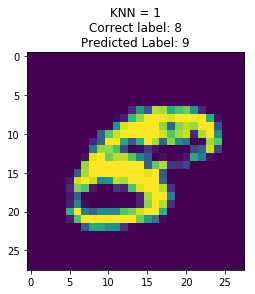

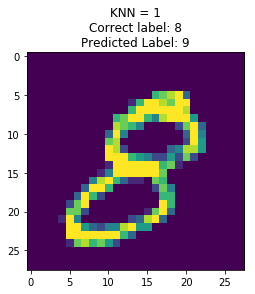

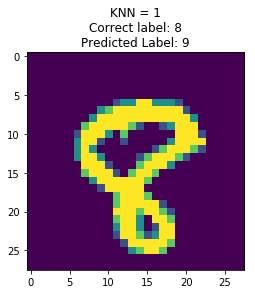

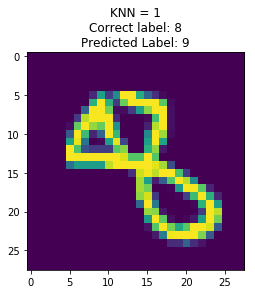

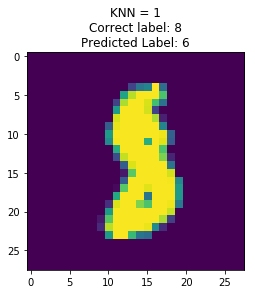

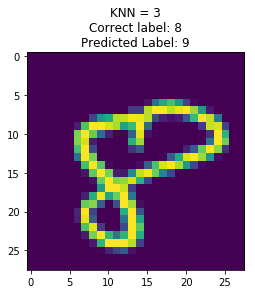

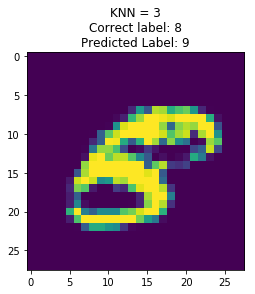

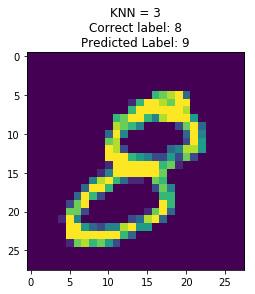

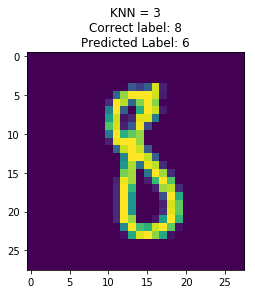

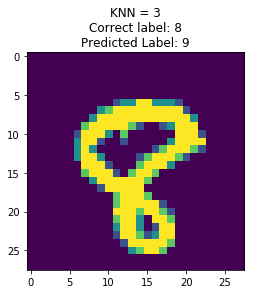

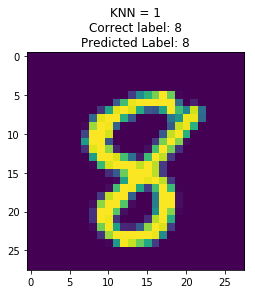

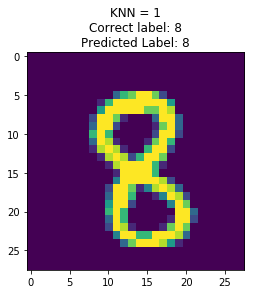

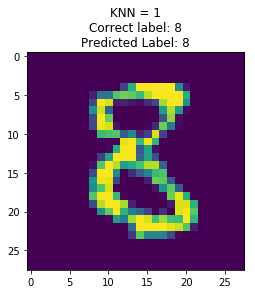

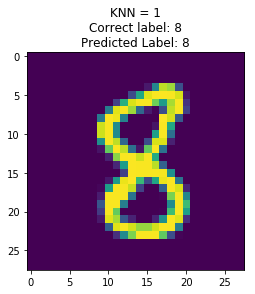

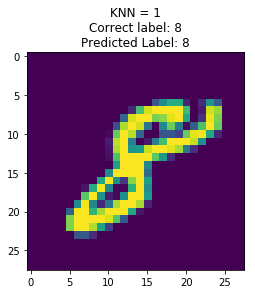

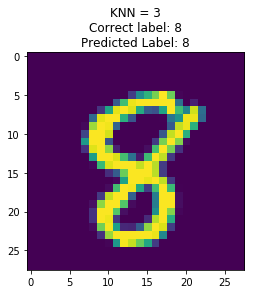

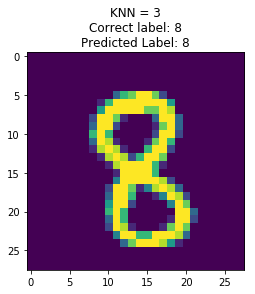

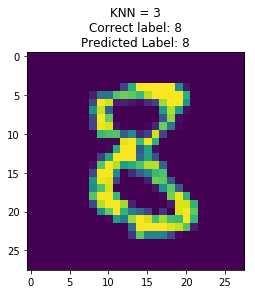

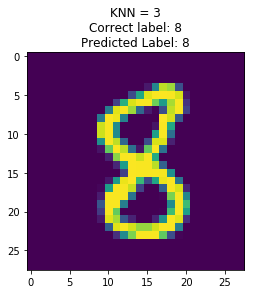

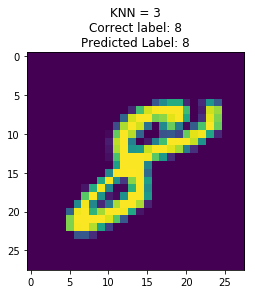

In [14]:
mismatch_1 = np.where(match_1 == 0)[0][:5]
mismatch_3 = np.where(match_3 == 0)[0][:5]
match_1 = np.where(match_1 == 1)[0][:5]
match_3 = np.where(match_3 == 1)[0][:5]
#print(mismatch_1)
#print(mismatch_3)
#plt.imshow(x[0].reshape((28,28)))
for i in range(5):
    plt.figure
    plt.imshow(x[test_label_index[mismatch_1[i]]].reshape((28,28)))
    plt.title("KNN = 1\nCorrect label: %i" %y[test_label_index[mismatch_1[i]]] +"\nPredicted Label: %i" %KNN1_label[mismatch_1[i]])
    plt.show()
for i in range(5):
    plt.figure
    plt.imshow(x[test_label_index[mismatch_3[i]]].reshape((28,28)))
    plt.title("KNN = 3\nCorrect label: %i" %y[test_label_index[mismatch_3[i]]] +"\nPredicted Label: %i" %KNN3_label[mismatch_3[i]])
    plt.show()
    
for i in range(5):
    plt.figure
    plt.imshow(x[test_label_index[match_1[i]]].reshape((28,28)))
    plt.title("KNN = 1\nCorrect label: %i" %y[test_label_index[match_1[i]]] +"\nPredicted Label: %i" %KNN1_label[match_1[i]])
    plt.show()
for i in range(5):
    plt.figure
    plt.imshow(x[test_label_index[match_3[i]]].reshape((28,28)))
    plt.title("KNN = 3\nCorrect label: %i" %y[test_label_index[match_3[i]]] +"\nPredicted Label: %i" %KNN3_label[match_3[i]])
    plt.show()

From these we can see that the ones that are misslabled are because they share very similar features with the images of a different labels. As we can see with the third image that was labeled incorrectlly, it has a very large upper circle and very small lower circle which. Both of those features make it look like a 9 rather than an 8, its true label. 

**H1.5**:

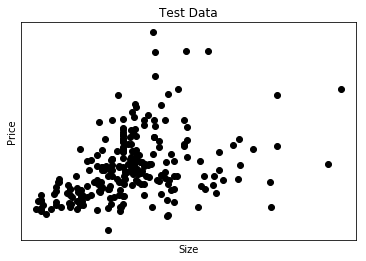

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
# Load CSV and columns
df = pd.read_csv('Housing.csv')
Y = df['price']
X = df['lotsize']
X = X.values
# Split the data into training/testing sets
X_train = X[:-250]
X_test = X[-250:]
# Split the targets into training/testing sets
Y_train = Y[:-250]
Y_test = Y[-250:]
# Plot outputs
plt.scatter(X_test, Y_test, color='black')
plt.title('Test Data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(())
plt.yticks(())
plt.show()